Just inport the liberies which we need later

In [ ]:
#deal with data set(read)
import pandas as pd
#dealing with arrays
import numpy as np
# for plot
import matplotlib.pyplot as plt
import seaborn as sus
%matplotlib inline


Use pandas to read the data from csv fils

In [ ]:
column =['sepal_length','sepal_width','petal_length','petal_width','class_labels']
#load the data
df=pd.read_csv('iris.data',names=column)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#lets analysis the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


That is normally use to see the all graph of the
The sus.pairplot(df, hue='class_labels') function from the seaborn library creates a grid of scatter plots for each pair of features in the DataFrame df

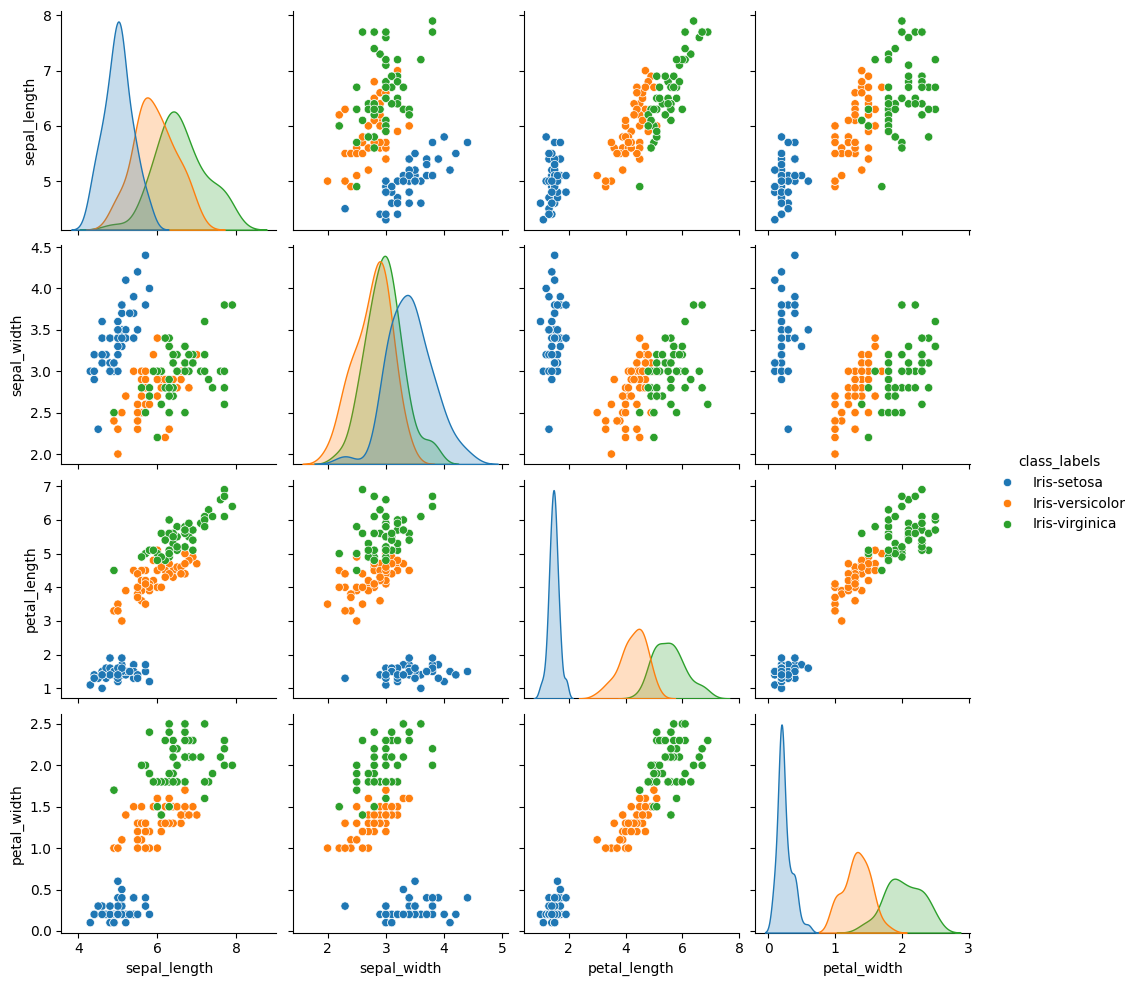

In [ ]:
#let visualize the data
#sus mean seaborn
sus.pairplot(df,hue='class_labels')

separate the target data into two section

In [ ]:
data=df.values
X=data[:,0:4]
Y=data[:,4]

In [ ]:
#Split the traing and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
#visulize the test and train
print(X_test)
print(Y_test)

[[6.5 3.0 5.5 1.8]
 [6.3 2.5 4.9 1.5]
 [4.6 3.6 1.0 0.2]
 [7.4 2.8 6.1 1.9]
 [6.8 3.0 5.5 2.1]
 [5.1 2.5 3.0 1.1]
 [6.1 2.9 4.7 1.4]
 [7.7 3.0 6.1 2.3]
 [4.8 3.4 1.6 0.2]
 [6.7 2.5 5.8 1.8]
 [6.7 3.0 5.0 1.7]
 [5.6 2.8 4.9 2.0]
 [4.7 3.2 1.6 0.2]
 [7.9 3.8 6.4 2.0]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [6.3 3.3 4.7 1.6]
 [5.6 2.5 3.9 1.1]
 [5.7 3.8 1.7 0.3]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [6.3 2.8 5.1 1.5]
 [5.3 3.7 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [6.0 2.2 5.0 1.5]
 [5.0 3.2 1.2 0.2]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 3.9 1.2]
 [5.9 3.0 4.2 1.5]
 [6.4 3.2 4.5 1.5]]
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-seto

Now time to add ML algo to train and fit the model

In [ ]:
#1st suport vector machine algo
from sklearn.svm import SVC
#now fit the model
model_svm=SVC() #just trnsfer the power to fiting
model_svm.fit(X_train,Y_train)

SVC()

In [ ]:
#predict the test cases of X
prediction1=model_svm.predict(X_test)
#check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction1))



0.9666666666666667


In [ ]:
# prompt: create a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction1)
print(cm)



[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]


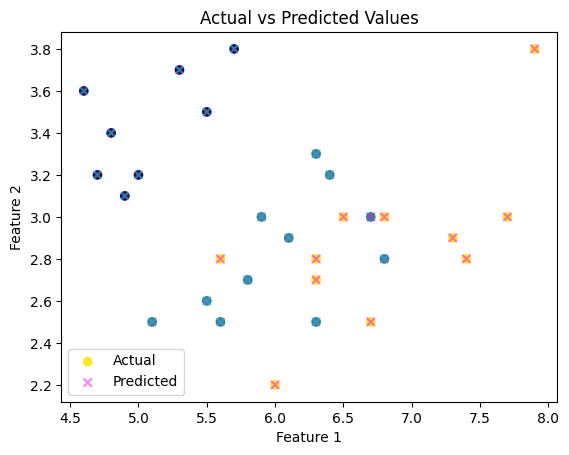

In [ ]:

# Example labels
labels = np.unique(Y_test)
label_map = {label: idx for idx, label in enumerate(labels)}

# Map labels to numeric values
Y_test_mapped = np.array([label_map[label] for label in Y_test])
prediction1_mapped = np.array([label_map[label] for label in prediction1])

# Plotting
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_mapped, cmap='viridis', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction1_mapped, cmap='cool', marker='x', label='Predicted', alpha=0.5)

plt.title('Actual vs Predicted Values')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Logistic Regression


In [ ]:

#2nd Logistic regression
from sklearn.linear_model import LogisticRegression
#now fit the model
model_LR=LogisticRegression() #just trnsfer the power to fiting
model_LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#now do the prediction
prediction2=model_LR.predict(X_test)
#check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction2))

0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction2)
print(cm)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


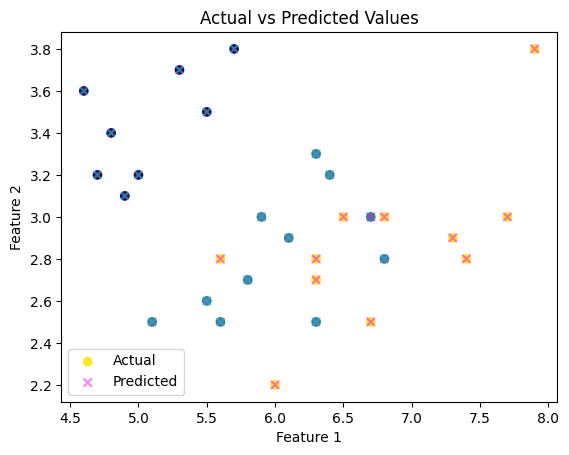

In [ ]:
# Example labels
labels = np.unique(Y_test)
label_map = {label: idx for idx, label in enumerate(labels)}

# Map labels to numeric values
Y_test_mapped = np.array([label_map[label] for label in Y_test])
prediction1_mapped = np.array([label_map[label] for label in prediction1])

# Plotting
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_mapped, cmap='viridis', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction1_mapped, cmap='cool', marker='x', label='Predicted', alpha=0.5)

plt.title('Actual vs Predicted Values')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#now fit the model
model_DT=DecisionTreeClassifier() #just trnsfer the power to fiting
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
prediction3=model_DT.predict(X_test)
#check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction3))

0.9


In [ ]:
import sklearn.metrics as metrics
cm = confusion_matrix(Y_test, prediction2)
print(cm)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


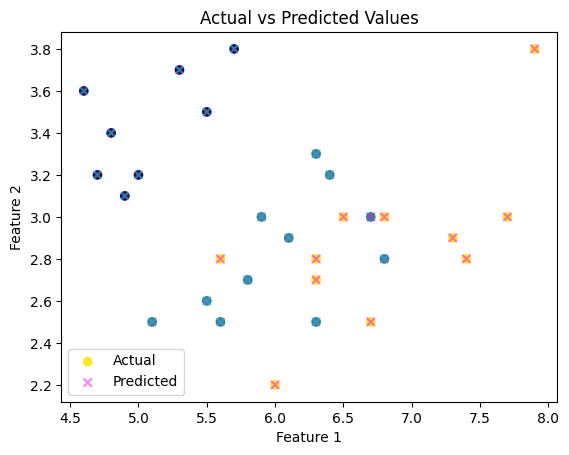

In [ ]:
# Example labels
labels = np.unique(Y_test)
label_map = {label: idx for idx, label in enumerate(labels)}

# Map labels to numeric values
Y_test_mapped = np.array([label_map[label] for label in Y_test])
prediction1_mapped = np.array([label_map[label] for label in prediction1])

# Plotting
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_mapped, cmap='viridis', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction1_mapped, cmap='cool', marker='x', label='Predicted', alpha=0.5)

plt.title('Actual vs Predicted Values')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Now do the prediction


In [ ]:
X_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[7,3.2,4.7,1.9]])
prediction=model_svm.predict(X_new)
print("Prediction of SVM:",prediction)

Prediction of SVM: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
